<a href="https://colab.research.google.com/github/Arthurads-rj/analise-dados-portfolio/blob/main/An%C3%A1lise_de_Review_de_Jogos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados da Indústria de Games

Neste notebook, fiz uma análise a cerca das resenhas feitas e notas dadas aos jogos lançados por volta de 2021



In [ ]:
#Bibliotecas Importadas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Exibi as primeiras dez linhas do dataset para ver se tinha algo de errado. Não parecia ter nada a princípio

In [ ]:
games = pd.read_csv('../content/drive/MyDrive/Planilhas/Games.csv')

games.head(10)

,Console,GameName,Review,Score
0,PC,Baldur's Gate 3 Early Access Review,Early Access,6
1,NS,Control: Ultimate Edition Cloud Version Review,Good,7
2,"XONE, PC, PS4",Doom Eternal: The Ancient Gods Part 1 Review,Good,7
3,"XONE, PC, PS4",Watch Dogs: Legion Review,Great,8
4,PC,Ring Of Pain Review,Great,8
5,NS,Pikmin 3 Deluxe Review,Great,8
6,"PC, XONE, PS4",Ghostrunner Review,Good,7
7,"PC, NS",Disc Room Review – Getting Buzzed,Great,8
8,"XONE, PS4",NHL 21 Review,Superb,9
9,PC,Noita Review,Good,7


## Tratamento de Dados

Resolvi remover todas as linhas que continham resenhas marcadas como 'Early Access', pois jogos Early Access podem mudar muito de uma atualização para outra, e isso pode influenciar muito em sua nota.

In [ ]:
games.drop(games.loc[games['Review']=='Early Access'].index, inplace=True)
games.head(10)

,Console,GameName,Review,Score
1,NS,Control: Ultimate Edition Cloud Version Review,Good,7
2,"XONE, PC, PS4",Doom Eternal: The Ancient Gods Part 1 Review,Good,7
3,"XONE, PC, PS4",Watch Dogs: Legion Review,Great,8
4,PC,Ring Of Pain Review,Great,8
5,NS,Pikmin 3 Deluxe Review,Great,8
6,"PC, XONE, PS4",Ghostrunner Review,Good,7
7,"PC, NS",Disc Room Review – Getting Buzzed,Great,8
8,"XONE, PS4",NHL 21 Review,Superb,9
9,PC,Noita Review,Good,7
10,PC,Amnesia: Rebirth Review,Great,8


Exibi um array com todas as notas de review dentro do dataset, e a nota "Essential" chamou a atenção pois ela não apareceu com tanta frequência. Então puxei todos os jogos que tinham essa nota.

In [ ]:
games.Review.unique()

array(['Good', 'Great', 'Superb', 'Fair', 'Terrible', 'Mediocre', 'Bad',
       'Poor', 'Essential', 'Abysmal'], dtype=object)

In [ ]:
games_essenciais = games.loc[games['Review'] == 'Essential']
games_essenciais

,Console,GameName,Review,Score
118,PC,Rainbow Six Siege Review (2020) - Breaches And...,Essential,1
132,PS4,Final Fantasy 7 Remake Review - First Class,Essential,1
134,PS4,Persona 5 Royal Review - Hearts Of Gold,Essential,1
186,PC,Disco Elysium Review - Pure Dynamite,Essential,1
222,"PC, PS4, NS",Divinity: Original Sin 2 Review - Switch Defin...,Essential,1
567,"WIIU, NS",Bayonetta 2 Review,Essential,1
630,NS,Super Mario Odyssey Review,Essential,1
788,"WIIU, NS",The Legend Of Zelda: Breath Of The Wild Review,Essential,1
985,PS4,Uncharted 4: A Thief's End Review,Essential,1
1111,PS4,Metal Gear Solid V: The Phantom Pain Review,Essential,1


E vi que os jogos listados como "Essential" estavam com nota 1. Então, para corrigir, mudei todos os valores da coluna 'Score' que estavam associados aos essenciais para 10.

In [ ]:
games.loc[games['Review'] == 'Essential', 'Score'] = 10

Abaixo, separei todos os consoles que estavam associados ao mesmo jogo devido ao lançamento multiplataforma.

In [ ]:
#Separando os consoles através da virgula com split()
games_consoles_separados = games.assign(Console = games.Console.str.split(","))

#Usando o comando explode() para separar a lista feita com o split() e formar outras linhas
games_consoles_separados = games_consoles_separados.explode('Console')
games_consoles_separados.Console = games_consoles_separados.Console.str.strip()

games_consoles_separados.head(10)

,Console,GameName,Review,Score
1,NS,Control: Ultimate Edition Cloud Version Review,Good,7
2,XONE,Doom Eternal: The Ancient Gods Part 1 Review,Good,7
2,PC,Doom Eternal: The Ancient Gods Part 1 Review,Good,7
2,PS4,Doom Eternal: The Ancient Gods Part 1 Review,Good,7
3,XONE,Watch Dogs: Legion Review,Great,8
3,PC,Watch Dogs: Legion Review,Great,8
3,PS4,Watch Dogs: Legion Review,Great,8
4,PC,Ring Of Pain Review,Great,8
5,NS,Pikmin 3 Deluxe Review,Great,8
6,PC,Ghostrunner Review,Good,7


Em seguida, usei o comando `Group By` para listar todos os consoles do dataset sem repetições.

In [ ]:
games_consoles_separados.groupby('Console').Console.count()

Console
3DS      166
AND       13
ARC        1
BB         4
DC       265
DS       540
FDS        1
GB         5
GBA      470
GBC      144
GC       455
GEN       39
IOS       62
LNX        1
MAC        7
MOBI     502
N64      272
NEO        8
NES       49
NGE       40
NGP        1
NGPC      24
NS       209
PC      4431
PS       932
PS2     1385
PS3      982
PS4      647
PSP      438
SAT      118
SNES      26
TCD        3
TG16      40
VITA     102
WEB        1
WII      468
WIIU      69
WINM       3
WOS        4
X360    1360
XBOX     794
XONE     309
ZOD        7
Name: Console, dtype: int64

Abaixo, agrupei os consoles com base no número de reviews que cada um recebeu, além de exibir a média, nota mínima, máxima e a mediana das notas.

In [ ]:
consoles_agrupados = games_consoles_separados[['Console', 'Score']].groupby('Console').agg(['count', 'mean', 'min', 'max', 'median'])
#conjunto de comandos para renomear as colunas
consoles_agrupados.columns = ['_'.join(col).strip() for col in consoles_agrupados.columns.values]
consoles_agrupados = consoles_agrupados.rename(columns={'Score_count': 'Numero De Reviews', 'Score_mean': 'Média', 'Score_min': 'Mínima', 'Score_max': 'Maxima',
                                                        'Score_median': 'Mediana'})
consoles_agrupados = consoles_agrupados.sort_values(by='Numero De Reviews', ascending=False)
consoles_agrupados

,Numero De Reviews,Média,Mínima,Maxima,Mediana
Console,,,,,
PC,4431,6.507335,1,10,7.0
PS2,1385,6.446209,1,10,7.0
X360,1360,6.537500,2,10,7.0
PS3,982,6.724033,1,10,7.0
PS,932,5.889485,1,10,6.0
XBOX,794,6.508816,1,9,7.0
PS4,647,7.092736,2,10,7.0
DS,540,6.146296,1,9,6.0
MOBI,502,6.519920,1,9,7.0


E para não ter muitos consoles com poucas reviews, resolvi limitar para o console ter mais de duzentas(200) reviews.

In [ ]:
top_consoles = consoles_agrupados[consoles_agrupados['Numero De Reviews'] > 200]
top_consoles = top_consoles.sort_values(by='Média', ascending=False)
top_consoles

,Numero De Reviews,Média,Mínimo,Maximo,Mediana
Console,,,,,
NS,209,7.421053,4,10,8.0
XONE,309,7.145631,2,10,7.0
PS4,647,7.092736,2,10,7.0
PS3,982,6.724033,1,10,7.0
X360,1360,6.537500,2,10,7.0
MOBI,502,6.519920,1,9,7.0
GC,455,6.516484,1,9,7.0
XBOX,794,6.508816,1,9,7.0
PC,4431,6.507335,1,10,7.0


## Análises

Depois de ter tratado os dados, posso começar a fazer algumas análises, como quais foram os melhores e piores jogos de consoles mais atuais como o PS4, Xbox One, Nintendo Switch e do PC.

Abaixo, o gráfico mostra quais são as médias de notas de cada console em ordem decrescente.

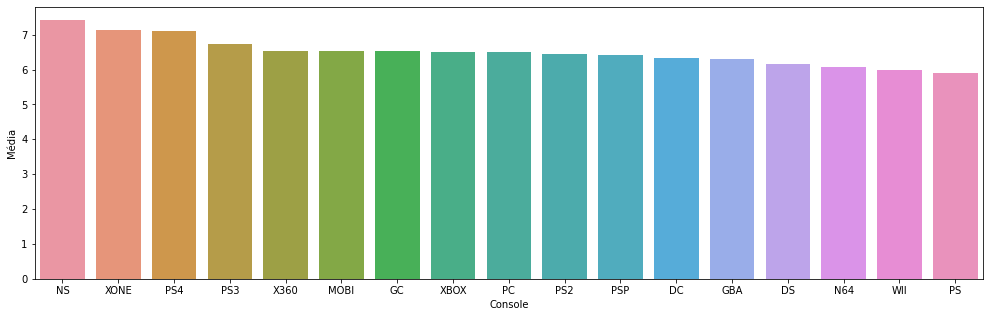

In [ ]:
plt.figure(figsize=(17,5))
sns.barplot(x=top_consoles.index, y=top_consoles['Média'])

Vemos que os três primeiros consoles são das gerações mais recentes tem médias mais altas que os outros. Dentre os eles, o que tem a maior média é o Nintendo Switch.

A especulação é de que como a Nintendo é uma empresa voltada específicamente para jogos, essa é a área em que eles mais investem, enquanto a Sony(PS4) e a Microsoft(Xbox One) são empresas multimídia.

### Melhores e piores jogos - PC

In [ ]:
games_pc = games_consoles_separados.loc[(games_consoles_separados.Console == 'PC')]
games_pc = games_pc.sort_values(by='Score', ascending=False)
games_pc.head(10)

,Console,GameName,Review,Score
118,PC,Rainbow Six Siege Review (2020) - Breaches And...,Essential,10
186,PC,Disco Elysium Review - Pure Dynamite,Essential,10
222,PC,Divinity: Original Sin 2 Review - Switch Defin...,Essential,10
1241,PC,The Witcher 3: Wild Hunt Review,Essential,10
885,PC,World of Warcraft: Legion Review,Superb,9
4238,PC,Batman: Arkham Asylum Review,Superb,9
13664,PC,EF2000 v2.0 Review,Superb,9
969,PC,Overwatch Review,Superb,9
4328,PC,Street Fighter IV Review,Superb,9
925,PC,Quadrilateral Cowboy Review,Superb,9


In [ ]:
games_pc.tail(10)

,Console,GameName,Review,Score
4472,PC,Stalin vs. Martians Review,Abysmal,1
11068,PC,Mistmare Review,Abysmal,1
12015,PC,Demonworld: Dark Armies Review,Abysmal,1
11361,PC,Gods and Generals Review,Abysmal,1
5504,PC,You Are Empty Review,Abysmal,1
14471,PC,Skydive! Review,Abysmal,1
11074,PC,NAVY SEALs: Weapons of Mass Destruction Review,Abysmal,1
10581,PC,Big Rigs: Over the Road Racing Review,Abysmal,1
14549,PC,Extreme Paintbrawl Review,Abysmal,1
12022,PC,Alcatraz: Prison Escape Review,Abysmal,1


### Melhores e piores jogos - Nintendo Switch

In [ ]:
games_nintendo_switch = games_consoles_separados.loc[(games_consoles_separados.Console == 'NS')]
games_nintendo_switch = games_nintendo_switch.sort_values(by='Score', ascending=False)
games_nintendo_switch.head(10)

,Console,GameName,Review,Score
222,NS,Divinity: Original Sin 2 Review - Switch Defin...,Essential,10
788,NS,The Legend Of Zelda: Breath Of The Wild Review,Essential,10
630,NS,Super Mario Odyssey Review,Essential,10
567,NS,Bayonetta 2 Review,Essential,10
387,NS,Diablo 3: Eternal Collection Switch Review - B...,Superb,9
108,NS,Xenoblade Chronicles: Definitive Edition Review,Superb,9
113,NS,What The Golf Switch Review - A Swing And A Hit,Superb,9
641,NS,Stardew Valley Review,Superb,9
133,NS,Animal Crossing: New Horizons Review - Island ...,Superb,9
616,NS,Rocket League Switch Review,Superb,9


In [ ]:
games_nintendo_switch.tail(10)

,Console,GameName,Review,Score
409,NS,FIFA 19 Nintendo Switch Review - Offside,Mediocre,5
389,NS,Black Bird Review - Featherweight,Mediocre,5
593,NS,Brawlout Review,Mediocre,5
194,NS,Little Town Hero Review - Brat Country,Mediocre,5
558,NS,Payday 2 Switch Review: Mo' Money Mo' Problems,Mediocre,5
104,NS,Liberated Review,Poor,4
115,NS,The Wonderful 101 Remastered Review - Mob Ment...,Poor,4
566,NS,Aegis Defenders Review,Poor,4
538,NS,Bridge Constructor Portal Review,Poor,4
149,NS,Snack World Review,Poor,4


### Melhores e piores jogos - Xbox One

In [ ]:
games_xbox_one = games.loc[(games.Console == 'XONE')]
games_xbox_one = games_xbox_one.sort_values(by='Score', ascending=False)
games_xbox_one.head(10)

,Console,GameName,Review,Score
1003,XONE,The Walking Dead: Michonne - Episode 2: Give N...,Superb,9
213,XONE,NHL 20 Review - Smashed,Superb,9
311,XONE,Devil May Cry 5 Review - From Zero To Nero,Superb,9
1802,XONE,Forza Motorsport 5 Review,Superb,9
1453,XONE,Minecraft Xbox One Edition Review,Superb,9
1332,XONE,Ori and the Blind Forest Review,Superb,9
1527,XONE,Dance Central Spotlight Review,Great,8
1362,XONE,#IDARB Review,Great,8
1186,XONE,Rare Replay Review,Great,8
989,XONE,The Walking Dead: Michonne - Episode 3: What W...,Great,8


In [ ]:
games_xbox_one.tail(10)

,Console,GameName,Review,Score
719,XONE,The Town Of Light Review,Poor,4
472,XONE,Earthfall Review: An Inferior Invasion,Poor,4
341,XONE,Genesis Alpha One Review - Drifting Without Di...,Poor,4
1804,XONE,Ryse: Son of Rome Review,Poor,4
285,XONE,Giga Wrecker Alt Review - Hunk Of Junk,Poor,4
71,XONE,Maid Of Sker Review - Backtracking Trip,Poor,4
1462,XONE,The Legend of Korra Review,Bad,3
1319,XONE,LA Cops Review,Bad,3
1533,XONE,Fighter Within Review,Terrible,2
938,XONE,7 Days to Die Review,Terrible,2


### Melhores e piores jogos - PS4

In [ ]:
games_ps4 = games.loc[(games.Console == 'PS4')]
games_ps4 = games_ps4.sort_values(by='Score', ascending=False)
games_ps4.head(10)

,Console,GameName,Review,Score
134,PS4,Persona 5 Royal Review - Hearts Of Gold,Essential,10
1111,PS4,Metal Gear Solid V: The Phantom Pain Review,Essential,10
985,PS4,Uncharted 4: A Thief's End Review,Essential,10
1200,PS4,Journey (PS4) Review,Essential,10
132,PS4,Final Fantasy 7 Remake Review - First Class,Essential,10
873,PS4,Rise of the Tomb Raider Review,Superb,9
1312,PS4,Bloodborne Review,Superb,9
453,PS4,F1 2018 Review - Victory Lap,Superb,9
442,PS4,Marvel's Spider-Man PS4 Review: Amazing Fantasy,Superb,9
723,PS4,Dirt 4 Review,Superb,9


In [ ]:
games_ps4.tail(10)

,Console,GameName,Review,Score
897,PS4,The Tomorrow Children Review,Bad,3
930,PS4,Ghostbusters Review,Bad,3
1464,PS4,Fluster Cluck Review,Bad,3
309,PS4,Left Alive Review - No Will To Survive,Bad,3
1416,PS4,Speakeasy Review,Bad,3
189,PS4,WWE 2K20 Review: Botchamania,Terrible,2
97,PS4,SpongeBob SquarePants: Battle for Bikini Botto...,Terrible,2
381,PS4,The Quiet Man Review - Silence Is Not Golden,Terrible,2
1220,PS4,Wander Review,Terrible,2
1129,PS4,Afro Samurai 2: Revenge of Kuma Volume One Review,Terrible,2
